In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('ADA_LR2_source.xlsx')

Saving ADA_LR2_source.xlsx to ADA_LR2_source.xlsx


In [ ]:
X = df.iloc[:, :9]
Y = df.iloc[:, 9]

In [ ]:
# Разделение исходных данных на тренировочные и тестовые

from sklearn.model_selection import train_test_split
random_seed = 27 # 12 для KNN-модели
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=random_seed, stratify=Y)
print('Распределение Y_train по классам 0 и 1 соответственно:', np.bincount(Y_train))
print('Распределение Y_test по классам 0 и 1 соответственно:', np.bincount(Y_test))

# Z-нормализация данных

mean_train = np.mean(X_train, axis=0)
deviation_train = np.std(X_train, axis=0)

X_train_norm = (X_train - mean_train) / deviation_train
X_test_norm = (X_test - mean_train) / deviation_train

Распределение Y_train по классам 0 и 1 соответственно: [18 14]
Распределение Y_test по классам 0 и 1 соответственно: [3 3]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
grid_params = {'n_neighbors': range(1, 26)}
grid = GridSearchCV(knn, grid_params, cv=5, scoring='accuracy')
knn_model = grid.fit(X_train_norm, Y_train)

print('Наилучший параметр (число соседей):', knn_model.best_params_)
print('Точность (без тестовых данных):', knn_model.best_score_ * 100)

knn_model_best = knn_model.best_estimator_
Y_predicted = knn_model_best.predict(X_test_norm)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр (число соседей): {'n_neighbors': 1}
Точность (без тестовых данных): 63.33333333333334
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
grid_params = {'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

grid = GridSearchCV(logistic_regression, grid_params, cv=5, scoring='accuracy')
logistic_model = grid.fit(X_train_norm, Y_train)

print('Наилучший параметр (метод решения):', grid.best_params_)
print('Точность (без тестовых данных):', grid.best_score_ * 100)

logistic_model_best = logistic_model.best_estimator_
Y_predicted = logistic_model_best.predict(X_test_norm)

print(classification_report(Y_test, Y_predicted))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(splitter='best')
grid_params = {'max_depth': range(1, 30)}

grid = GridSearchCV(decision_tree, grid_params, cv=5, scoring='accuracy')
decision_tree_model = grid.fit(X_train_norm, Y_train)

print('Наилучший параметр (глубина дерева):', grid.best_params_)
print('Точность (без тестовых данных):', grid.best_score_ * 100)

decision_tree_model_best = decision_tree_model.best_estimator_
Y_predicted = decision_tree_model_best.predict(X_test_norm)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр (глубина дерева): {'max_depth': 1}
Точность (без тестовых данных): 55.714285714285715
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
grid_params = {'max_depth': range(1, 30)}

grid = GridSearchCV(random_forest, grid_params, cv=5, scoring='accuracy')
random_forest_model = grid.fit(X_train_norm, Y_train)

print('Наилучший параметр (глубина леса):', grid.best_params_)
print('Точность без тестовых данных:', random_forest_model.best_score_ * 100)

random_forest_model_best = random_forest_model.best_estimator_
Y_predicted = random_forest_model_best.predict(X_test_norm)

print(classification_report(Y_test, Y_predicted))

Наилучший параметр (глубина леса): {'max_depth': 11}
Точность без тестовых данных: 59.999999999999986
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



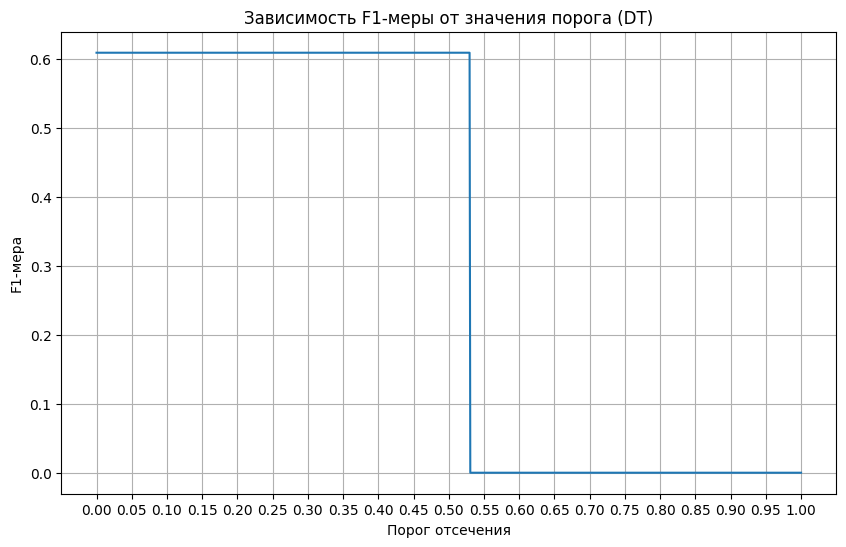

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

thresholds = np.linspace(0, 1, 1000)
f1_values = []
Y_prob_values = random_forest_model_best.predict_proba(X_train)[:, 1]

for threshold in thresholds:
  Y_predicted = []
  for value in Y_prob_values:
    if value >= threshold:
      Y_predicted.append(1)
    else:
      Y_predicted.append(0)
  f1 = f1_score(Y_train, Y_predicted)
  f1_values.append(f1)



plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_values)
plt.xlabel('Порог отсечения')
plt.ylabel('F1-мера')
plt.grid(True)
plt.title('Зависимость F1-меры от значения порога (DT)')
plt.xticks(np.arange(0, 1.05, 0.05))
plt.show()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

Y_prob_values = random_forest_model_best.predict_proba(X_train_norm)[:, 1]
Y_predicted = []

for value in Y_prob_values:
  if value >= 0.5:
    Y_predicted.append(1)
  else:
    Y_predicted.append(0)

print('Accuracy: ', accuracy_score(Y_train, Y_predicted))
print('Precision: ', precision_score(Y_train, Y_predicted))
print('Recall: ', recall_score(Y_train, Y_predicted))
print('F1: ', f1_score(Y_train, Y_predicted))
print('ROC-AUC', roc_auc_score(Y_train, Y_predicted))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
ROC-AUC 1.0


In [ ]:
logistic_model_best.coef_[0]

array([ 0.31399521, -0.50555733,  1.1707514 , -0.70196637, -0.13216789,
        0.02303455, -0.35202038, -0.37467281,  0.57165752])

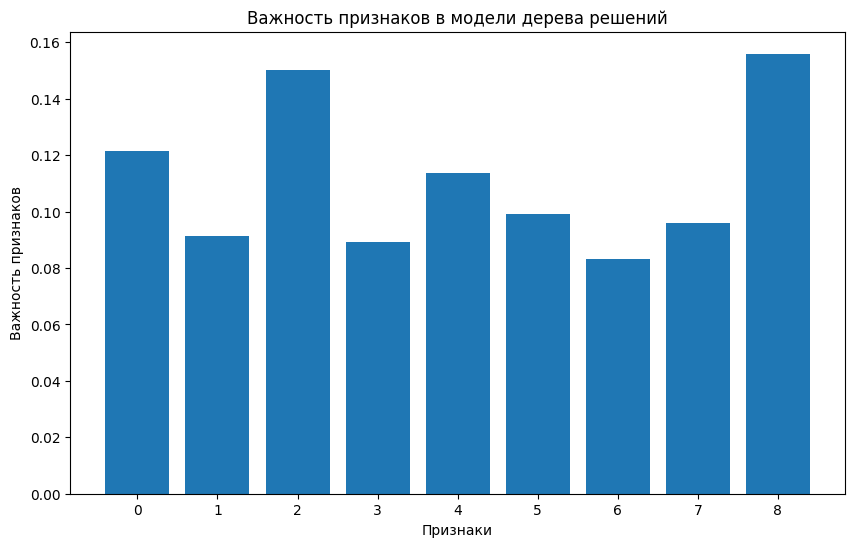

In [ ]:
feature_importance = random_forest_model.best_estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(np.arange(0, 9, 1))
plt.xlabel('Признаки')
plt.ylabel('Важность признаков')
plt.title('Важность признаков в модели дерева решений')
plt.show()